In [30]:
import pandas as pd
import numpy as np
import io
import os
import time

In [31]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [32]:
train = df.set_index('country')

In [33]:
train.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [34]:
train.isna().any()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

# First Task

## Confusion Matrix

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt

In [36]:
corr = train.corr()

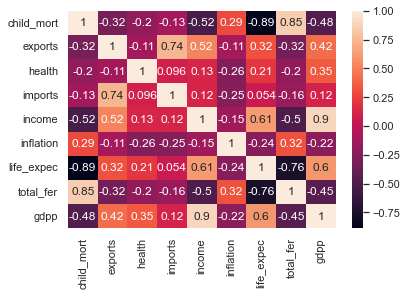

In [37]:
sn.heatmap(corr, annot=True)
plt.show()

In [38]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

In [39]:
train

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
country,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13
...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95


## Normalization

In [40]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(train)

## K-Means

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans.labels_

array([3, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 3, 0, 0, 1, 0,
       0, 1, 1, 3, 3, 0, 3, 1, 0, 3, 3, 1, 0, 0, 3, 3, 3, 1, 3, 1, 1, 1,
       1, 0, 0, 0, 0, 3, 3, 1, 0, 1, 1, 0, 3, 1, 1, 3, 1, 0, 0, 3, 3, 0,
       3, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 0, 0, 1, 1, 3,
       3, 0, 1, 2, 1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 1, 0, 1, 0, 3, 0, 3, 0,
       1, 1, 3, 4, 1, 0, 3, 1, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 3, 1, 1,
       3, 2, 1, 1, 0, 3, 1, 1, 0, 0, 3, 0, 1, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3])


### Elbow

In [42]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

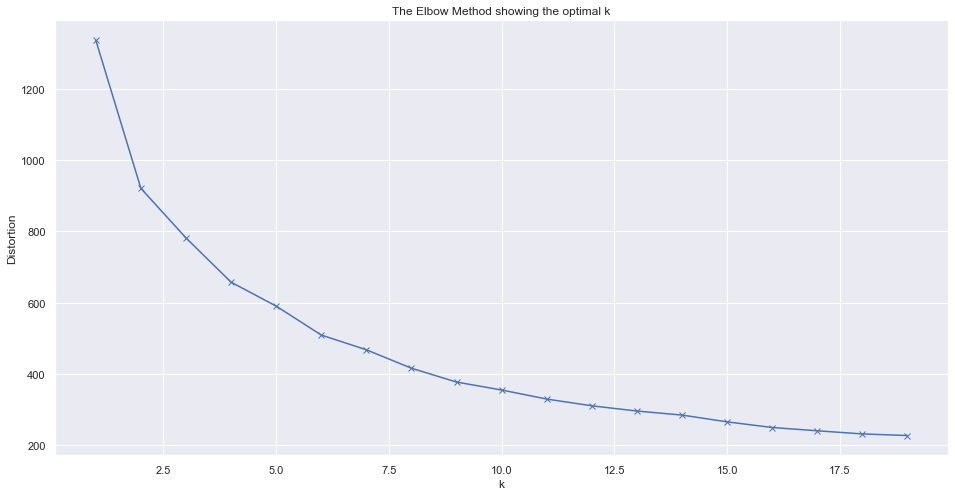

In [45]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(X)

### silhouette

In [47]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.329


In [48]:
max(df['exports'])

200.0

In [49]:
label

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

### Visualize

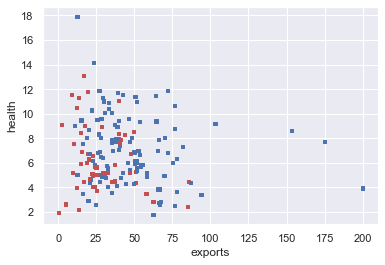

In [50]:
import matplotlib.pyplot as plt

filtered_label1 = df['exports']
 
filtered_label2 = df['health']

filtered_label3 = df['total_fer']
colormap = np.array(['r', 'b'])


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(filtered_label1, filtered_label2, s=10, c=colormap[label], marker="s", label='exports')

plt.xlabel('exports')
plt.ylabel('health')

plt.show()

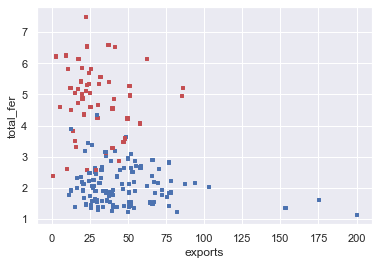

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(filtered_label1, filtered_label3, s=10, c=colormap[label], marker="s", label='exports')

plt.xlabel('exports')
plt.ylabel('total_fer')

plt.show()

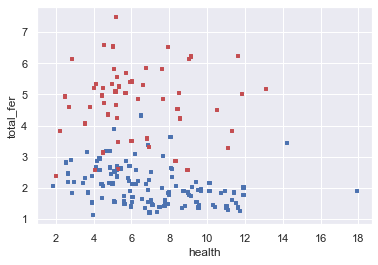

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(filtered_label2, filtered_label3, s=10, c=colormap[label], marker="s", label='exports')

plt.xlabel('health')
plt.ylabel('total_fer')

plt.show()

# Second Task

## PCA

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## I

In [54]:
pca = PCA(n_components=8)
pca.fit(X)

PCA(n_components=8)

## II

In [55]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.singular_values_)

[3.59615705 1.55324696 1.17038164 0.74324181 0.56558787 0.22483356
 0.10919005 0.08555385]
[0.4468279  0.19299326 0.14542167 0.09234891 0.07027514 0.02793591
 0.01356703 0.01063019]
[0.4468279  0.63982116 0.78524283 0.87759173 0.94786687 0.97580278
 0.98936981 1.        ]
[24.43280727 16.05736574 13.9385563  11.1075713   9.68956068  6.10920374
  4.25741089  3.76854593]


# III

In [56]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

In [57]:
X_pca = pca.transform(X)
print("original shape:   ", df.shape)
print("transformed shape:", X_pca.shape)

original shape:    (167, 10)
transformed shape: (167, 4)


In [58]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    distortions.append(kmeanModel.inertia_)

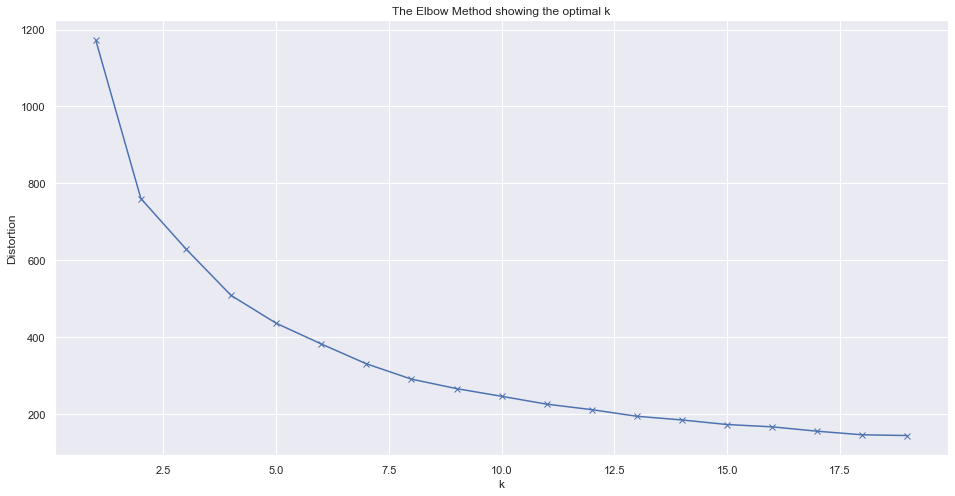

In [59]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## V

In [60]:
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(X_pca)

In [61]:
score = silhouette_score(X_pca, kmeans.labels_, metric = 'euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.362


## IV

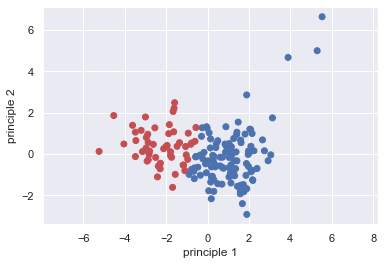

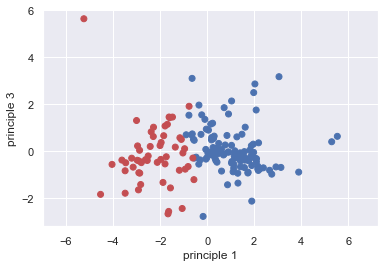

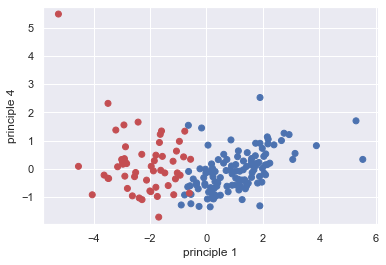

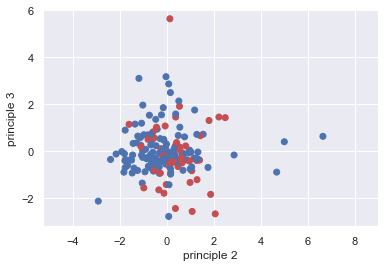

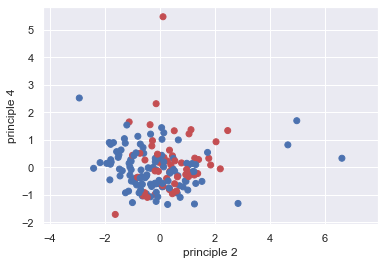

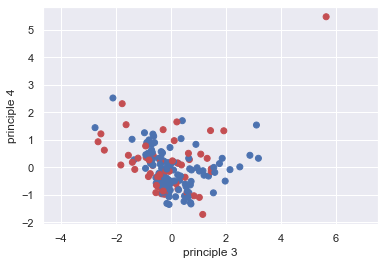

In [62]:
for i in range(4):
    for j in range(i + 1, 4):
        plt.scatter(X_pca[:,i], X_pca[:,j], c=colormap[label],marker="o", picker=True)

        plt.axis('equal');
        
        plt.xlabel(f'principle {i + 1}')
        plt.ylabel(f'principle {j + 1}')
        
        plt.show()